In [36]:
% matplotlibinline

# Dependencies

import pandas as pd
import json
from pathlib import Path
from py_scripts.Master_df import Master_NC_Dataframe
import matplotlib.pyplot as plt
import seaborn as sns


UsageError: Line magic function `%` not found.


In [37]:
# Create a new dataframe which is a subset of the Master DataFrame containing relevant columns for statistical analysis.

relevant_columns = [
    "County",
    "year",
    "Active Dentists",
    "Active Primary Care Physicians",
    "Beds in General Hospitals",
    "Infant Deaths",
    "Divorces",
    "Low-Weight Births Under 2500 Grams",
    "Persons Served in Area Mental Health Programs",
    "Pregnancies for Females 15-19",
    "Pregnancies for Females of All Ages",
    "Registered Nurses",
    "Reported Abortions",
    "Resident Deaths",
    "Resident Live Births",
    "Estimated Median Family Income(HUD)",
    "Families in Poverty",
    "Families in Poverty with Related Children",
    "Persons in Poverty",
    "People (<High School)",
    "Percent Below Poverty",
    "People (Below Poverty)",
    "Percent Unemployed",
    "People (Unemployed)",
    "Population (Census/Estimate/Projection)",
    "Population Density (Persons per Square Mile)",
    "Black Population",
    "Black Persons in Poverty",
    "death_per_1000_infant_death",
    "White Persons in Poverty",
    "Hispanic Persons in Poverty"

]
relevant_statistics_df = Master_NC_Dataframe[relevant_columns]

In [38]:
# Convert certain columns to per 1000 counts.

per_thousand_df = relevant_statistics_df.copy()

# Columns to convert to per 1000 counts.
per_thousand_columns = [
    "Active Dentists",
    "Active Primary Care Physicians",
    "Beds in General Hospitals",
    "Divorces",
    "Low-Weight Births Under 2500 Grams",
    "Persons Served in Area Mental Health Programs",
    "Pregnancies for Females 15-19",
    "Pregnancies for Females of All Ages",
    "Registered Nurses",
    "Reported Abortions",
    "Resident Deaths",
    "Resident Live Births",
    "Families in Poverty",
    "Families in Poverty with Related Children",
    "Persons in Poverty",
    "People (<High School)",
    "People (Below Poverty)",
    "People (Unemployed)",
    "Black Population",
    "Black Persons in Poverty",
    "White Persons in Poverty",
    "Hispanic Persons in Poverty"

]

for column in per_thousand_columns:
    per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000

# per_thousand_df = per_thousand_df[["County"] + ["year"] + ["death_per_1000_infant_death"]+ ["Population (Census/Estimate/Projection)"] + per_thousand_columns]
per_thousand_df = per_thousand_df[["County"] + ["death_per_1000_infant_death"]+ per_thousand_columns]



C:\Users\samue\AppData\Local\Temp\ipykernel_32080\3388970169.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot = True, cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

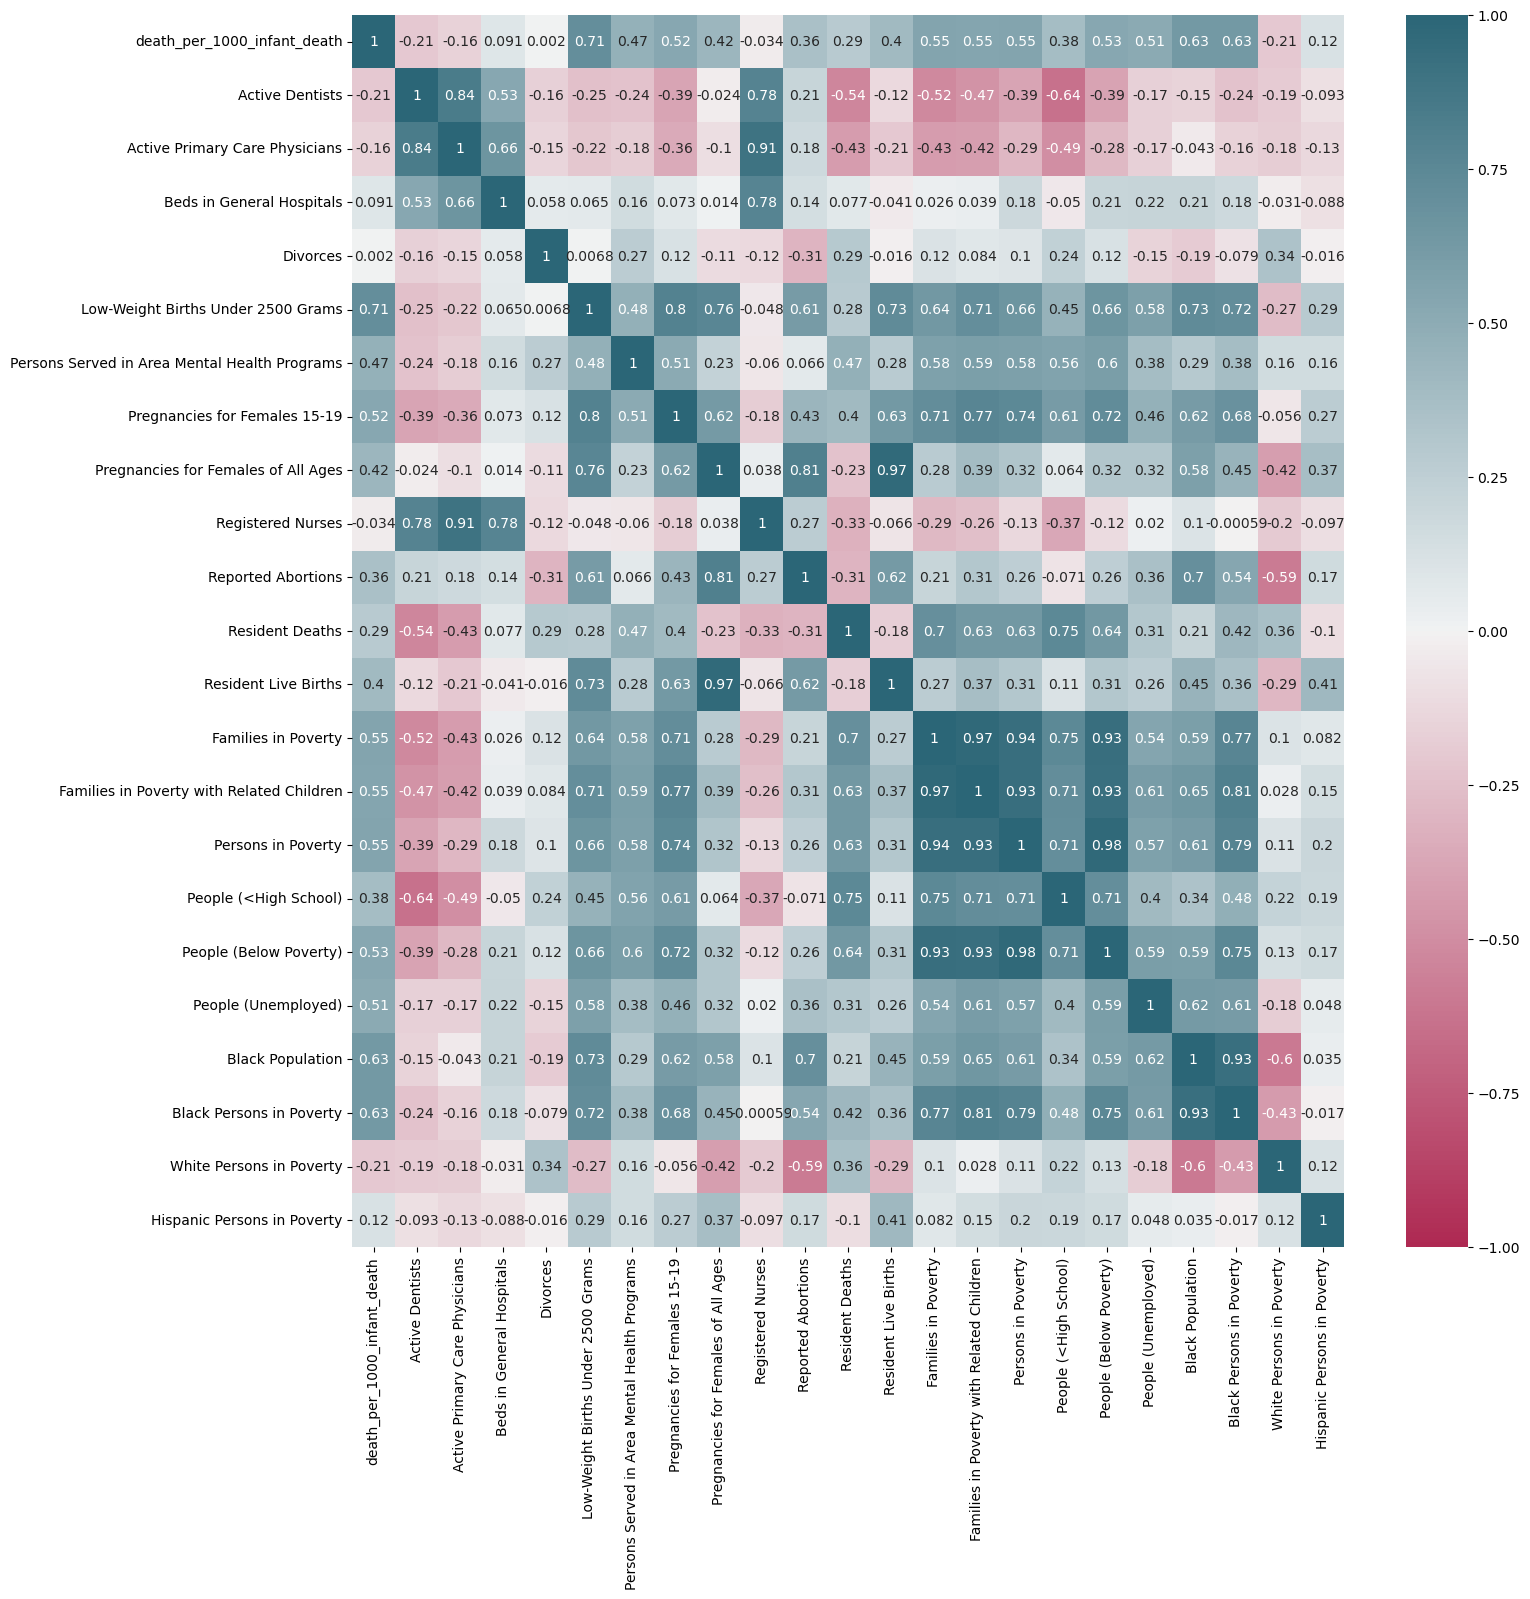

In [40]:
per_thousand_df_no_zeros = per_thousand_df[(per_thousand_df != 0 ).all(axis=1)]

plt.figure(figsize=(16,16))
sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot = True, cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))
